<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# CLT, Confidence Intervals, and Hypothesis Testing

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Read in the housing data (code provided).


In [3]:
!pwd

/Users/patrickbrown/Documents/GitHub/General-Assembly-Data-Science-Coursework-2017/Week_2/Homework_for_lesson_5/exercise 3


In [4]:
data = pd.read_csv('Data/housing.csv')


NOX = data['NOX'].values
AGE = data['AGE'].values

### 1. Find the mean, standard deviation, and the standard error of the mean for variable `AGE`

In [5]:
age_mean = np.mean(data['AGE'])
age_sd = np.std(data['AGE'])
age_se = stats.sem(data['AGE'])
print 'The mean of age is %s and the standard deviation is %s and the standard error is %s' % (age_mean, age_sd, age_se)

The mean of age is 68.5749011858 and the standard deviation is 28.1210325702 and the standard error is 1.25136952526


### 2. Generate a 90%, 95%, and 99% confidence interval for `AGE`

You can use the `scipy.stats.t.interval` function to calculate confidence interval range.

```python
# Endpoints of the range that contains alpha percent of the distribution
stats.t.interval(alpha, df, loc=0, scale=1)	
```

Arguments:
- `df` = the degrees of freedom, will be the length of the vector -1.
- `loc` = the mean of the t-distribution (your point estimate - mean of the variable)
- `scale` = the standard deviation of the t-distribution (the standard error of your sample mean)

**Interpret the results from all three confidence intervals.**

In [6]:
from scipy.stats import t

In [11]:
age_conf_1 = stats.t.interval(alpha=0.1, df=1, loc=68.5749011858, scale=1.25136952526)
age_conf_1

(68.376703723902452, 68.773098647697552)

In [12]:
age_conf_05 = stats.t.interval(alpha=0.05, df=1, loc=68.5749011858, scale=1.25136952526)
age_conf_05

(68.476416268293718, 68.673386103306285)

In [13]:
age_conf_001 = stats.t.interval(alpha=0.01, df=1, loc=68.5749011858, scale=1.25136952526)
age_conf_001

(68.555243102423432, 68.594559269176571)

Confidence limits for the mean are an interval estimate for the mean. Interval estimates are often desirable because the estimate of the mean varies from sample to sample. Instead of a single estimate for the mean, a confidence interval generates a lower and upper limit for the mean. The interval estimate gives an indication of how much uncertainty there is in our estimate of the true mean. The narrower the interval, the more precise is our estimate.

Confidence limits are expressed in terms of a confidence coefficient. Although the choice of confidence coefficient is somewhat arbitrary, in practice 90 %, 95 %, and 99 % intervals are often used, with 95 % being the most commonly used.

As a technical note, a 95 % confidence interval does not mean that there is a 95 % probability that the interval contains the true mean. The interval computed from a given sample either contains the true mean or it does not. Instead, the level of confidence is associated with the method of calculating the interval. The confidence coefficient is simply the proportion of samples of a given size that may be expected to contain the true mean. That is, for a 95 % confidence interval, if many samples are collected and the confidence interval computed, in the long run about 95 % of these intervals would contain the true mean.  As the sample size used to compute the confidence interval gets larger, our confidence interval narrows (this makes sense since our denominator grows in size).

### 3. Did you rely on the Central Limit Theorem in question 2? Why or why not? Explain.

Yes, because we have used the standard deviation of the t-distribution to estimate the standard deviation of the sampling distribution of the sample mean or the standard error.  It is also the fact that we expect the mean of the sampling distribution of the sample mean to be the same as the mean of the population that enables us to factor such confidence levels.  So although the sample is not normally distributed, the sampling distribution of the sample means are and from that we can infer facts about the parameter.

To apply the Central Limit Theorem, we do not need to generate all possible samples. It is sufficient to know that proofs exist that the principle generally applies.

### 4. For the variable `NOX`, generate a 95% confidence interval and interpret it.

In [16]:
nox_mean = np.mean(data['NOX'])
nox_sd = np.std(data['NOX'])
nox_se = stats.sem(data['NOX'])
nox_med = np.median(data['NOX'])
print 'The mean of NOX is %s and the standard deviation is %s, the median is %s and the standard error is %s' % (nox_mean, nox_sd, nox_med, nox_se)

The mean of NOX is 0.554695059289 and the standard deviation is 0.115763115407, the median is 0.538 and the standard error is 0.00515139102403


In [17]:
nox_conf_mean = stats.t.interval(alpha=0.05, df=1, loc=0.554695059289, scale=0.00515139102403)
nox_conf_1

(0.55428963602288783, 0.55510048255511213)

Our result connotes that in 95/100 cases, our sample contains the population mean. But we cannot be entirely sure in this case whether our sample is one of the 5 samples that does not contain the mean or one of the 95.  The level of dispersion of the sample means in this case suggests that there is a good chance that our sample mean is reflective of the population mean.

### 5. For the variable `NOX`, test the hypothesis that the mean is equal to the median. 

You may use scipy functions to complete this, but complete all steps - define hypotheses, etc. Let alpha = 0.05. Interpret your results.

H0 = Nox mean != Nox median
H1 = Nox mean = Nox median

For this, we will create a two tailed test since the null hypothesis is that the mean and median are the same. 



nox_conf_med = stats.t.interval(alpha=0.005, df=1, loc=0.538, scale=0.00515139102403)
nox_conf_1

In [22]:
nox_conf_mean = stats.t.interval(alpha=0.05, df=1, loc=0.554695059289, scale=0.00515139102403)
print(The confidence interval for the mean of NOX is:) nox_conf_mean

SyntaxError: invalid syntax (<ipython-input-22-3618557a4120>, line 2)

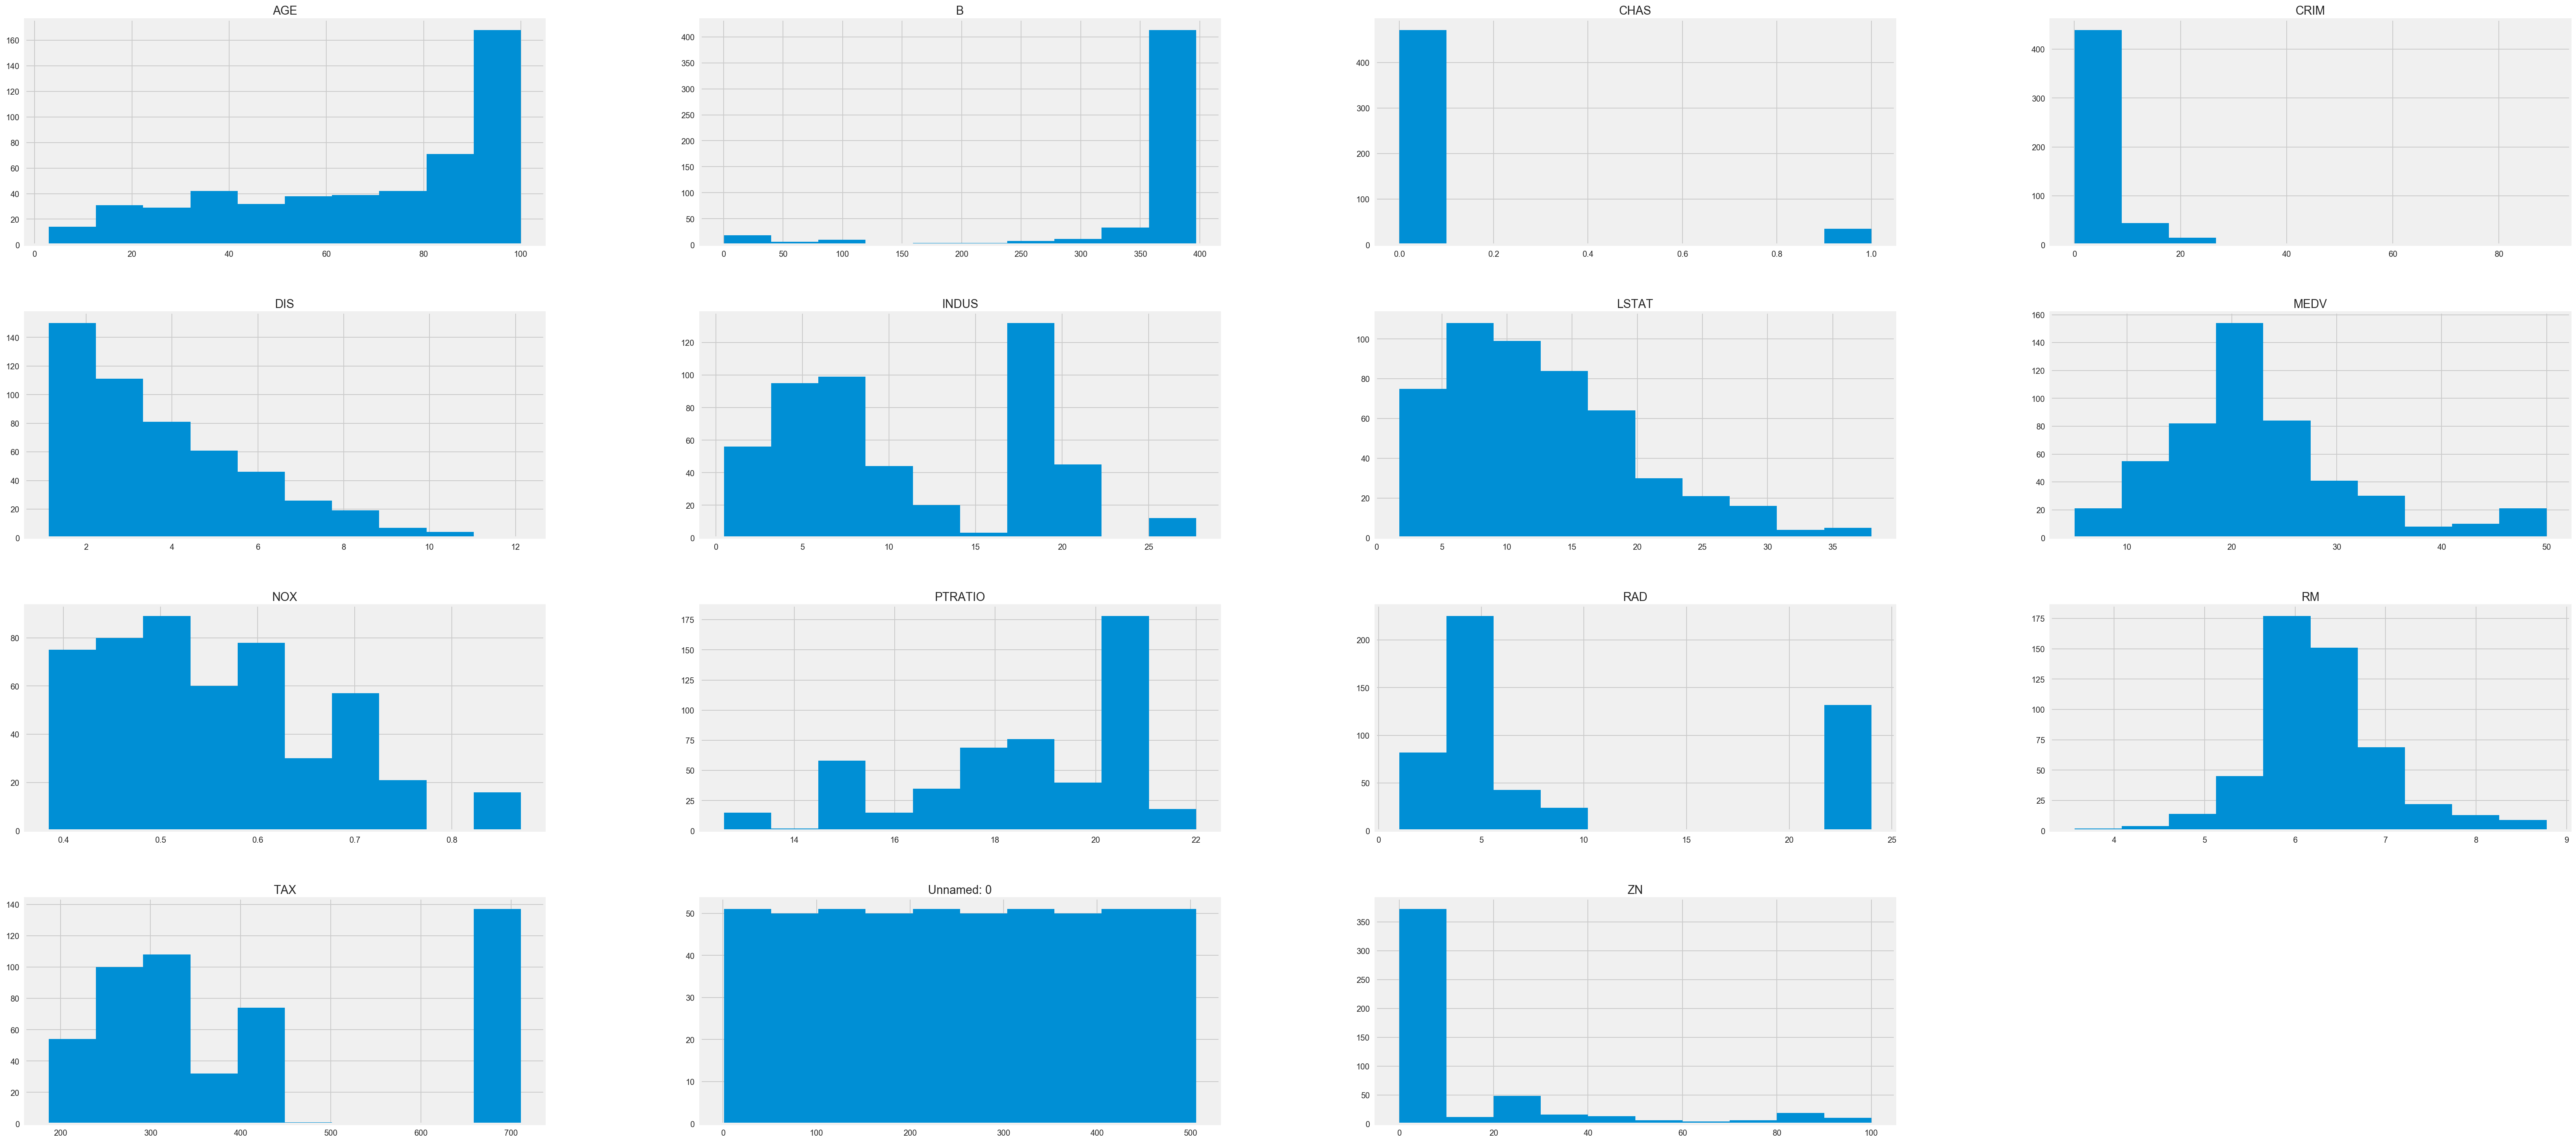

In [13]:
data.hist(figsize=(50,25))
plt.show()

### 6. What do you notice about the results from Exercise 4 and Exercise 5? 

**If you were going to generalize this to the relationship between hypothesis tests and confidence intervals, what might you say? Be specific.**

You can use either P values or confidence intervals to determine whether your results are statistically significant. If a hypothesis test produces both, these results will agree.

The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%.

If the P value is less than your significance (alpha) level, the hypothesis test is statistically significant.

If the confidence interval does not contain the null hypothesis value, the results are statistically significant.

If the P value is less than alpha, the confidence interval will not contain the null hypothesis value.

### 7. For the variable `NOX`, test the hypothesis that the mean is greater than or equal to the median. 

You may use scipy functions to complete this, but complete all steps - define hypotheses, etc. Let alpha = 0.05. Interpret your results.

### 8. Compare the p-values from Exercise 5 and Exercise 7. What do you notice?